<a href="https://colab.research.google.com/github/megan-the-astronomer/ASTR229/blob/main/making_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building code to solve problems

The last few assignments have covered some basic python functionality. Now let's start putting the pieces together.

First, we'll make a theoretical H-R diagram using our model for a star - a blackbody.

Next, we'll use filter transmission curves to predict what the emission from different stars at different wavelengths we can observe with the McDonald 30". Finally, we'll use these results to make an H-R diagram.

This notebook lays out the specific steps you need to take but provides fewer specific details about how to write the code. This is a great chance to practice skills like writing functions, using loops and conditonals, etc., that will make life easier in future projects.

In [ ]:
# start by importing a few essential packages
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy.io import fits
from astropy.table import Table

# The model for a star - calculating a blackbody spectrum

For more about blackbody radiation, see Chapter 1 of Chromey or the [LibreText Physics section](https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_(OpenStax)/University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/06%3A_Photons_and_Matter_Waves/6.02%3A_Blackbody_Radiation) on the topic.

Start by writing a function to produce a blackbody of a given temperature. The intensity of a blackbody as a function of temperature and wavelength is given by the following equation:

\begin{equation}
I(\lambda, T) = \frac{2\pi h c^2}{\lambda^5} \frac{1}{ e^{h c / \lambda k_B T} - 1}
\end{equation}

where
$\lambda$ is the wavelength,
$T$ is the temperature in Kelvin,
$h$ is the Planck constant,
$c$ is the speed of light,
and $k_B$ is the Boltzmann constant.

Take a moment to look at the units. The intensity produced by this equation has units of energy per time per area per wavelength. Note that the total energy flux coming out of the star depends on the surface area or size of the star (sound familiar?).

For a given temperature, this will produce the intensity per wavelength. The full distribution is the spectral energy distribution (SED) - that is, how much energy there is per wavelength of light.

Before you start writing your function, notice that many of quantities that have to be defined in your function are constants. Fortunately, you can easily access many of these values from ```astropy.constants```.

### introducing astropy.constants

The astropy constants package includes a number of constants often used in astronomy. Each constant is a ```Quantity``` - that is, a number with an associated unit - and some metadata that describes the source of the data and the uncertainty.

As always, you are encouraged to take a look at the [documentation](https://docs.astropy.org/en/stable/constants/index.html).

In [ ]:
# import the constants with the shortcut name const
import astropy.constants as const

In [ ]:
# speed of light
const.c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [ ]:
print(const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018


You can use these quantities in much the same way as other numbers for mathematical operations. The associated units are very convenient for bookkeeping and a great way to check that your answer makes sense.

In [ ]:
# calculate a speed that is a fraction of the speed of light
const.c * 0.75

<Quantity 2.24844344e+08 m / s>

### introducing astropy.units

You can also assign units youself using the ```astropy.units``` package.

Be sure to look at the documentation to see the power and limitations of the units package:
https://docs.astropy.org/en/stable/units/index.html

In [ ]:
import astropy.units as u

In [ ]:
my_velocity = 100. * u.km / u.s

In [ ]:
my_velocity

<Quantity 100. km / s>

```astropy.units``` makes it easy to convert units.

In [ ]:
const.c.to(u.km/u.s)

<Quantity 299792.458 km / s>

In cases where you do not want the units attached, you can get just the numerical value by putting ```.value``` at the end of the variable name.


In [ ]:
my_velocity.value

100.0

And similarly, the check the units associated with your quantity, use ```.unit```.

In [ ]:
my_velocity.unit

Unit("km / s")

Finally, a word of caution - while the ```astropy.units``` package is very useful, it won't do the thinking for you. It's always a good idea to check your units and do your own dimensional analysis to make sure that the answer the computer spits out actually makes sense!

In [ ]:
my_velocity / const.c

<Quantity 3.33564095e-07 km / m>

### write and test a function to create a blackbody spectrum

Use the equation above to write a function to produce a blackbody spectrum for a given temperature. I recommend that you provide two inputs for the function - the temperature, and the range of wavelengths. Including the range of wavelengths as a second input makes it easy to adjust the spectral coverage in case you need a broader or more narrow range of wavelengths.

In [ ]:
# your code here

### calculate the bolometric flux coming out of your model star

An ideal bolometer would measure every photon of every wavelength coming from your star. Calculate the bolometric flux emerging from your model star. To do this, you need to integrate your blackbody curve over all wavelengths.


In [ ]:
# your code here

### calculate the luminosity of the Sun

We've calculated the flux emerging from our model star. To convert this to a luminosity, we need to include the size of the star.

To start, let's do this for the Sun. Note: you do not need any new equations yet!

In [ ]:
# your code here

Compare your calculated luminosity to the measured luminosity of the Sun.

In [ ]:
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

### calculating luminosity using $L= \sigma A T^4$

Write a function to calculate the luminosity of a blackbody of a given size and temperature using the equation $L = \sigma A T^4$.

Be sure to test your function by calculating the luminosity of the Sun.

In [ ]:
# your code here

What about other stars? How can we estimate their size?

We can approximate the radius of a main sequence star as $r \sim M$. Use the file ```ms_updated.dat``` in the ASTR229_data folder to get a list of stellar masses for stars of a given temperature and luminosity. Use these data to estimate the radii of stars of different masses.

A tip to make life easier: notice that the masses in the ```ms_updated.dat``` file are given as a multiple of the mass of the Sun. You can do the same thing with the radius of the star - give it in units of Solar radii.

In [ ]:
# your code here

### make an H-R diagram

Now that you have functions to calculate the luminosity of a [model] star of a given temperature, use this make an H-R diagram.

Things looking strange? Make sure your axes are going in the correct direction. You may also wish to try plotting your axes on a log scale instead of a linear scale.

In [ ]:
# your code here

# Making predictions from our model

We could have made our H-R diagram using just a list of temperatures and the equation $L=\sigma A T^4$. However, this only gives the total luminosity. Much as we would like to get data at every wavelength, often this is not practically possible. Instead, we are usually trying to understand our objects using just a few data points.

To get a better estimate of what we can observe, we are now going to use the blackbody function to predict the relative flux from different stars in different wavelengths of light. In images, we select specific wavelengths using filters. For example, the V band filter allows the transmission of light with wavelengths between about $500$ nm and $700$ nm.

### using PyAstronomy to get filter data and functions

To make our job easier, we'll use the ```PyAstronomy``` library. This package includes the transmission curves for the kind of imaging filters we have access to on McDonald. The library also includes convenience functions to convolve the filter transmission curve with a spectrum to determine how much emission we can expect in that region of the spectrum.

```PyAstronomy``` is *not* included in colab as standard, so we'll need to install and import it manually. After you do this, you will also have to restart the colab session because ```PyAstronomy``` uses a different version of ```numpy``` than the colab standard.  

If you are running this on your local machine, you may want to make sure you install ```PyAstronomy``` in a dedicated environment so you don't accidentally break any of your other code. (This kind of version incompatibility is one of the big complaints folks have about python as a computing language.)

In [ ]:
pip install PyAstronomy

In [ ]:
# get the astronomy library
from PyAstronomy import pyasl

The first time you run ```PyAstronomy``` it will ask you where you want to save the data files. In colab, you can accept the defaults. Remember, in colab, you will have to repeat this process everytime you restart a session.

In [ ]:
tcs = pyasl.TransmissionCurves()

 -------------- Configure PyA's data path ------------------------
  Why do you get this message?
    Most probably PyA tries to save permanent data on your
    system for the first time. This may be the case when, e.g.,
    a table is downloaded and saved. These data are stored
    under PyA's 'data path', i.e., a regular directory on
    your disk, which PyA can access.
  Is anything else saved to the disk?
    The location of the data path
    directory will be written to the file '.pyaConfigWhere' in
    your home directory, so that you need not provide it
    again.
  Can I delete it?
    Yes, you are free to delete anything of this at any time.
  What is a valid data path?
    You may provide any existing or non-existing path, although
    it is strongly encouraged to use a fresh directory to avoid any
    confusion. The given path needs to be absolute, to uniquely
    identify it.
 -----------------------------------------------------------------

Configure PyA's data path now (

First, take a look at what bandpass data comes with the library.

In [ ]:
tcs.availableBands()

['Bessel b',
 'Bessel i',
 'Bessel r',
 'Bessel u',
 'Bessel v',
 'Gaia_DR3_G',
 'Gaia_DR3_G_BP',
 'Gaia_DR3_G_RP',
 'Johnson B',
 'Johnson U',
 'Johnson V']

We can plot the transmission curve to see how efficiently photons of different wavelengths can pass through the filter. In this case, a higher efficiency is better. An ideal filer would look like a top hat - perfect transmission in the wavelength range of interest and zero everywhere else. In practice, perfect filters are impossible to manufacture so transmission curves have some shape to them.

Let's look at the V band filter.

In [ ]:
vdata = tcs.getTransCurveData('Bessel v')

In [ ]:
vdata

array([[4.70e+03, 0.00e+00],
       [4.80e+03, 3.00e-02],
       [4.90e+03, 1.63e-01],
       [5.00e+03, 4.58e-01],
       [5.10e+03, 7.80e-01],
       [5.20e+03, 9.67e-01],
       [5.30e+03, 1.00e+00],
       [5.40e+03, 9.73e-01],
       [5.50e+03, 8.98e-01],
       [5.60e+03, 7.92e-01],
       [5.70e+03, 6.84e-01],
       [5.80e+03, 5.74e-01],
       [5.90e+03, 4.61e-01],
       [6.00e+03, 3.59e-01],
       [6.10e+03, 2.70e-01],
       [6.20e+03, 1.97e-01],
       [6.30e+03, 1.35e-01],
       [6.40e+03, 8.10e-02],
       [6.50e+03, 4.50e-02],
       [6.60e+03, 2.50e-02],
       [6.70e+03, 1.70e-02],
       [6.80e+03, 1.30e-02],
       [6.90e+03, 9.00e-03],
       [7.00e+03, 0.00e+00]])

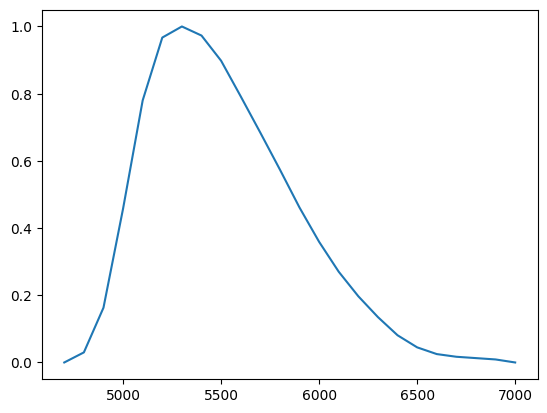

In [ ]:
plt.plot(vdata[:,0], vdata[:,1])

Notice that there are no units attached to this data, so we need to know something about this dataset. The first column is the wavelength in Angstroms and the second column gives the filter transmission - a value that varies between zero and (almost) one. You can think of the transmission as the percent of the light that passes through at that wavelength.

First, try plotting the filter transmission curves on top of a blackbody spectrum. Hint: you may want to normalize the intensity so that it varies between zero and one and can be plotted on the same scale as the transmission curves.

In [ ]:
# your code here

Now we'll use the convenience function ```convolveWith()``` to convolve our blackbody curves with the filter transmission. The convolution allows us to determine how one function modifies another.

Try this for the 5 filters that best approximate the filters that we have available on the McDonald 30": the Bessel UBVRI filters.

For the V band, this might look like ```vsun = tcs.convolveWith(lambdas, sun, 'Bessel v')``` where ```lambdas``` is an array of wavelengths, ```sun``` is the blackbody spectrum calculated for the temperature of the Sun, and the ```'Bessel v'``` specifies the specific band.


In [ ]:
# your code here

Once you have done this for all 5 bands, plot the resulting intensities on top of your original blackbody curve.

In [ ]:
# your code here

### predicting what we'll see in a V band image

We're almost there. Before the next step, take a moment to check your units and think about what we have calculated so far.

We generated a blackbody spectrum to represent the energy coming out of our star per time per surface area per wavelength.

When we convolve with the filter function we are selecting only some wavelengths from the full spectrum (notice that the ```vsun``` curve is zero everywhere outside the filter coverage). When we take an image, we are essentially taking the sum or integral of all those wavelengths.

This still does not account for the distance to the [model] stars. However, we will assume we are modeling a star cluster so we can assume that all the stars are at the same distance. This means that the flux we measure at these wavelengths will scale up or down for all stars in the same way.

But thanks to history, what is the quantity we measure in our images? The apparent magnitude,
\begin{equation}
m = -2.5 \log_{10}(F) + K
\end{equation}
where $m$ is the apparent magnitude, $F$ is the flux, and $K$ is a constant. For now, assume $K=0$.

Write a function to calculate the magnitude from the flux.


In [ ]:
# your code here

Now calculate the apparent magnitude you would measure in the V band and the B band.

In [ ]:
# your code here

Finally, make a plot of (B-V) versus V for your model cluster. You can use the data in ```ms_updated.dat``` for a sample of temperatures. Be sure to label your plot axes!

In [ ]:
# your code here